In [1]:
import requests 
import os
import pandas as pd
import numpy as np

In [2]:
base_url = "https://rickandmortyapi.com/api/character"

##### Comprobamos la API

In [3]:
# Realización de la petición GET
respuesta = requests.get(base_url)  

# Imprimimos el código de estado en la respuesta (response)
print(f"Request {respuesta.status_code} : '{respuesta.reason}'")

Request 200 : 'OK'


##### Obtenemos los datos y los convertimos a JSON.

In [4]:
datos = respuesta.json()
import pprint
pp = pprint.PrettyPrinter(indent=1) #pprint es para ponerlo bonito
pp.pprint(datos)


{'info': {'count': 826,
          'next': 'https://rickandmortyapi.com/api/character?page=2',
          'pages': 42,
          'prev': None},
 'results': [{'created': '2017-11-04T18:48:46.250Z',
              'episode': ['https://rickandmortyapi.com/api/episode/1',
                          'https://rickandmortyapi.com/api/episode/2',
                          'https://rickandmortyapi.com/api/episode/3',
                          'https://rickandmortyapi.com/api/episode/4',
                          'https://rickandmortyapi.com/api/episode/5',
                          'https://rickandmortyapi.com/api/episode/6',
                          'https://rickandmortyapi.com/api/episode/7',
                          'https://rickandmortyapi.com/api/episode/8',
                          'https://rickandmortyapi.com/api/episode/9',
                          'https://rickandmortyapi.com/api/episode/10',
                          'https://rickandmortyapi.com/api/episode/11',
                      

##### Consultamos las claves

In [5]:
datos.keys()

dict_keys(['info', 'results'])

In [6]:
#veamos que hay en 'info'
datos['info']

{'count': 826,
 'pages': 42,
 'next': 'https://rickandmortyapi.com/api/character?page=2',
 'prev': None}

In [7]:
#veamos que hay en 'results'
datos['results']

[{'id': 1,
  'name': 'Rick Sanchez',
  'status': 'Alive',
  'species': 'Human',
  'type': '',
  'gender': 'Male',
  'origin': {'name': 'Earth (C-137)',
   'url': 'https://rickandmortyapi.com/api/location/1'},
  'location': {'name': 'Citadel of Ricks',
   'url': 'https://rickandmortyapi.com/api/location/3'},
  'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
   'https://rickandmortyapi.com/api/episode/2',
   'https://rickandmortyapi.com/api/episode/3',
   'https://rickandmortyapi.com/api/episode/4',
   'https://rickandmortyapi.com/api/episode/5',
   'https://rickandmortyapi.com/api/episode/6',
   'https://rickandmortyapi.com/api/episode/7',
   'https://rickandmortyapi.com/api/episode/8',
   'https://rickandmortyapi.com/api/episode/9',
   'https://rickandmortyapi.com/api/episode/10',
   'https://rickandmortyapi.com/api/episode/11',
   'https://rickandmortyapi.com/api/episode/12',
   'https://rickandmortyapi.com

#### CREAR LA FUNCIÓN DE OBTENCIÓN DE PERSONAJES MEDIANTE EL USO DE API 

In [8]:
"""
   La función "obtener_datos_personajes" crea una lista vacía llamada personajes.
   Establece una variable i en 0.
   Mientras la condición sea verdadera, realiza una solicitud GET a la URL establecida en la variable base_url,
   pasando como parámetro el valor de la variable i más 1.
   La variable d recibe el resultado de la solicitud, el cual es un archivo JSON, y se almacena el valor de "results".
   Si el resultado es nulo, se rompe el bucle.
   En caso contrario, se extiende la lista personajes con el resultado de la solicitud y se incrementa la variable i en 1.
"""


'\n   La función "obtener_datos_personajes" crea una lista vacía llamada personajes.\n   Establece una variable i en 0.\n   Mientras la condición sea verdadera, realiza una solicitud GET a la URL establecida en la variable base_url,\n   pasando como parámetro el valor de la variable i más 1.\n   La variable d recibe el resultado de la solicitud, el cual es un archivo JSON, y se almacena el valor de "results".\n   Si el resultado es nulo, se rompe el bucle.\n   En caso contrario, se extiende la lista personajes con el resultado de la solicitud y se incrementa la variable i en 1.\n'

In [9]:
base_url = "https://rickandmortyapi.com/api/character"

In [10]:
import requests
import pandas as pd

def obtener_datos_personajes():

    personajes = []
    i = 1

    while True:
        respuesta = requests.get(f"https://rickandmortyapi.com/api/character?page={i}")
        d = respuesta.json()

        if not d.get('results'):
            break
        else:
            personajes.extend(d['results'])
            i += 1
    return personajes

df = pd.DataFrame(obtener_datos_personajes())


In [11]:
df

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z
...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/822,2021-11-02T17:18:31.934Z
822,823,Young Beth,unknown,Human,,Female,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/823,2021-11-02T17:19:00.951Z
823,824,Young Beth,unknown,Human,,Female,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/824,2021-11-02T17:19:47.957Z
824,825,Young Jerry,unknown,Human,,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/825,2021-11-02T17:20:14.305Z


In [12]:
df.shape

(826, 12)

In [13]:
# guardamos en un csv

df.to_csv('ricky_morty_clean.csv')

In [14]:
#Limpiamos la columna origin dejando solo el nombre de donde nació (despues de 'name': y antes de url': '')

df['origin']

0      {'name': 'Earth (C-137)', 'url': 'https://rick...
1                         {'name': 'unknown', 'url': ''}
2      {'name': 'Earth (Replacement Dimension)', 'url...
3      {'name': 'Earth (Replacement Dimension)', 'url...
4      {'name': 'Earth (Replacement Dimension)', 'url...
                             ...                        
821    {'name': 'Earth (Unknown dimension)', 'url': '...
822    {'name': 'Earth (Unknown dimension)', 'url': '...
823    {'name': 'Earth (Unknown dimension)', 'url': '...
824    {'name': 'Earth (Unknown dimension)', 'url': '...
825    {'name': 'Earth (Replacement Dimension)', 'url...
Name: origin, Length: 826, dtype: object

In [19]:
def limpiar_origin(row):
    if row and 'name' in row:
        return row['name']
    else:
        return None

# Aplica la función a la columna 'origin'
df['origin'] = df['origin'].apply(limpiar_origin)


In [20]:
df

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),"{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,unknown,"{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),"{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),"{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),"{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z
...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),"{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/822,2021-11-02T17:18:31.934Z
822,823,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),"{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/823,2021-11-02T17:19:00.951Z
823,824,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),"{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/824,2021-11-02T17:19:47.957Z
824,825,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),"{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/825,2021-11-02T17:20:14.305Z


In [21]:
#hago lo mismo con la columna location 
def limpiar_origin(row):
    if row and 'name' in row:
        return row['name']
    else:
        return None

# Aplica la función a la columna 'origin'
df['location'] = df['location'].apply(limpiar_origin)

In [22]:
df

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z
...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/822,2021-11-02T17:18:31.934Z
822,823,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/823,2021-11-02T17:19:00.951Z
823,824,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/824,2021-11-02T17:19:47.957Z
824,825,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),Earth (Unknown dimension),https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/825,2021-11-02T17:20:14.305Z


In [24]:
#elimino la columna image, url y created ya que no las vamos a usar en este ejercicio

df.drop(['image', 'url', 'created'], axis=1)

,id,name,status,species,type,gender,origin,location,episode
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht..."
1,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht..."
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht..."
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht..."
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht..."
...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),Earth (Unknown dimension),[https://rickandmortyapi.com/api/episode/51]
822,823,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),Earth (Unknown dimension),[https://rickandmortyapi.com/api/episode/51]
823,824,Young Beth,unknown,Human,,Female,Earth (Unknown dimension),Earth (Unknown dimension),[https://rickandmortyapi.com/api/episode/51]
824,825,Young Jerry,unknown,Human,,Male,Earth (Unknown dimension),Earth (Unknown dimension),[https://rickandmortyapi.com/api/episode/51]


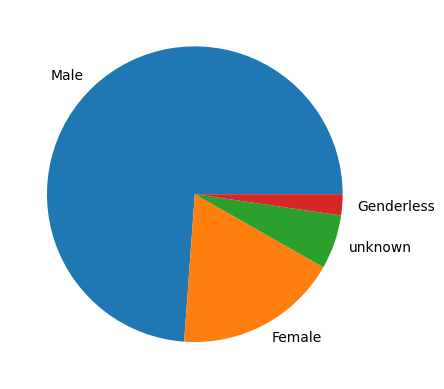

In [30]:
#Proporción de géneros 

generos = df['gender'].value_counts()

import matplotlib.pyplot as plt

plt.pie(generos, labels=generos.index)
plt.show()


In [32]:
import plotly.express as px

species = df['species'].value_counts()

px.treemap(species, path=[species.index], values=species, height=700, title='Tamaño de las especies', color_discrete_sequence = px.colors.qualitative.Dark2, template= 'plotly_dark')